In [15]:
import matplotlib.pyplot as plt
from datamodule import WUSUSegmentationDataModule
import torch

In [37]:
# Ottengo il dataloader di training che mi consente di iterare su tutto il training set
DATA_ROOT = "/shared/marangi/projects/EVOCITY/building_extraction/data/WUSU_preprocessed"
CLASS_MAPPING_PATH = "/shared/marangi/projects/EVOCITY/building_extraction/data/OpenWUSU512/class_mapping.json"

# Definisco data module: gestisce tutta la logica di caricamento dei set di dati e istanziazione dei dataloader
datamodule = WUSUSegmentationDataModule(
    data_root=DATA_ROOT,
    class_mapping_path=CLASS_MAPPING_PATH,
    batch_size=1,
    num_workers=1
)
datamodule.setup('stats')
blue_sums = []
blue_sq_sums = []
green_sums = []
green_sq_sums = []
red_sums = []
red_sq_sums = []
nir_sums = []
nir_sq_sums = []
for datapoint in range(datamodule.train_dataset.__len__()):
    image = datamodule.train_dataset.__getitem__(datapoint)['image']
    image = image / 255.0  # Riporto i valori tra 0 e 1
    blue_sums.append(image[0,:,:].sum().item())
    blue_sq_sums.append(torch.square(image[0,:,:]).sum().item())
    green_sums.append(image[1,:,:].sum().item())
    green_sq_sums.append(torch.square(image[1,:,:]).sum().item())
    red_sums.append(image[2,:,:].sum().item())
    red_sq_sums.append(torch.square(image[2,:,:]).sum().item())
    nir_sums.append(image[3,:,:].sum().item())
    nir_sq_sums.append(torch.square(image[3,:,:]).sum().item())
print(blue_sums)
print(blue_sq_sums)
print(green_sums)
print(green_sq_sums)
print(red_sums)
print(red_sq_sums)
print(nir_sums)
print(nir_sq_sums)
n_pixels = len(datamodule.train_dataset)*image.shape[1]*image.shape[2]
means = [
    sum(blue_sums) / (n_pixels),
    sum(green_sums) / (n_pixels),
    sum(red_sums) / (n_pixels),
    sum(nir_sums) / (n_pixels)
]
stds = [
    (sum(blue_sq_sums) / (n_pixels) - means[0]**2)**0.5,
    (sum(green_sq_sums) / (n_pixels) - means[1]**2)**0.5,
    (sum(red_sq_sums) / (n_pixels) - means[2]**2)**0.5,
    (sum(nir_sq_sums) / (n_pixels) - means[3]**2)**0.5
]
print("Means: ", means)
print("Stds:", stds)

/shared/marangi/utils/miniconda/miniconda/envs/evocity_env/lib/python3.12/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[109813.71875, 103354.4375, 89030.921875, 91436.75, 96230.5546875, 99431.5390625, 90215.75, 76853.546875, 71497.03125, 68794.4765625, 65918.7109375, 69517.796875, 72161.9140625, 85855.9140625, 75664.78125, 72837.2578125, 69084.1484375, 73318.6640625, 74365.9296875, 73000.859375, 68723.6015625, 50185.21484375, 33772.83984375, 30936.2890625, 80743.296875, 95030.4375, 95563.015625, 89939.1171875, 84008.671875, 86221.8046875, 95356.2734375, 97992.1484375, 85138.2421875, 71241.0078125, 66279.7109375, 77601.171875, 66984.1484375, 65326.765625, 67753.2890625, 69093.0078125, 65321.27734375, 64607.98828125, 68625.5859375, 74405.796875, 73832.515625, 71210.390625, 79321.921875, 61075.44921875, 52420.41796875, 54743.3515625, 50214.38671875, 80793.0625, 83339.75, 84605.5546875, 84647.40625, 87337.625, 92387.28125, 78466.34375, 92072.2265625, 85346.3515625, 79933.7109375, 76103.6171875, 71309.8515625, 70964.5390625, 73998.8828125, 71540.7734375, 66335.796875, 67405.2578125, 74978.0390625, 70873.625

In [34]:
WUSU_MEANS = [60.862431586572065, 60.14200775711625, 59.58274396944217, 69.85295084927102]
WUSU_STDS = [33.92976461834848, 34.12665488243311, 35.27960972101711, 41.15969251882479]

In [21]:
print(len(blue_sums))
print(len(blue_sq_sums))
print(len(green_sums))
print(len(green_sq_sums))
print(len(red_sums))
print(len(red_sq_sums))
print(len(nir_sums))
print(len(nir_sq_sums))

1674
1674
1674
1674
1674
1674
1674
1674


In [ ]:
# Ottengo il dataloader di training che mi consente di iterare su tutto il training set
DATA_ROOT = "/shared/marangi/projects/EVOCITY/building_extraction/data/WUSU_preprocessed"
CLASS_MAPPING_PATH = "/shared/marangi/projects/EVOCITY/building_extraction/data/OpenWUSU512/class_mapping.json"

# Definisco data module: gestisce tutta la logica di caricamento dei set di dati e istanziazione dei dataloader
datamodule = WUSUSegmentationDataModule(
    data_root=DATA_ROOT,
    class_mapping_path=CLASS_MAPPING_PATH,
    batch_size=1,
    num_workers=1
)
datamodule.setup('stats')
blue_sums = []
blue_sq_sums = []
green_sums = []
green_sq_sums = []
red_sums = []
red_sq_sums = []
nir_sums = []
nir_sq_sums = []
for datapoint in range(2):
    image = datamodule.train_dataset.__getitem__(datapoint)['image']
    blue_sums.append(image[0,:,:].sum().item())
    blue_sq_sums.append(torch.square(image[0,:,:]).sum().item())
    green_sums.append(image[1,:,:].sum().item())
    green_sq_sums.append(torch.square(image[1,:,:]).sum().item())
    red_sums.append(image[2,:,:].sum().item())
    red_sq_sums.append(torch.square(image[2,:,:]).sum().item())
    nir_sums.append(image[3,:,:].sum().item())
    nir_sq_sums.append(torch.square(image[3,:,:]).sum().item())
print(nir_sums)
print(nir_sq_sums)
print(red_sums)
print(red_sq_sums)

print(blue_sums)
print(blue_sq_sums)
        

In [73]:
datamodule.setup()

/shared/marangi/utils/miniconda/miniconda/envs/evocity_env/lib/python3.12/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


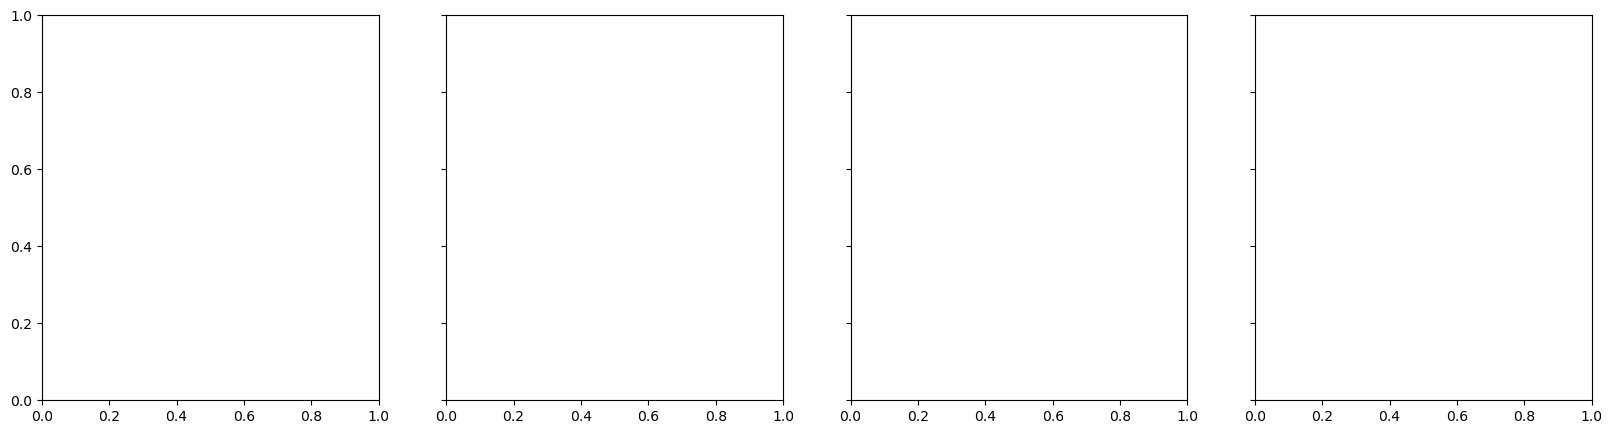

In [45]:
#itero sul dataloader.
# per ogni immagine
# per ogni canale
# accumulo due quantità: somma e somma dei quadrati
# calcolo media e deviazione standard per canale
n_channels=3
for batch in train_loader:
    image = batch['image']  # (B, C, H, W)
    image = image.squeeze(0)
    n_channels = image.shape[0]
    fig, axes = plt.subplots(1, n_channels, figsize=(n_channels*5 ,5), sharey=True)
    break

In [46]:
image[3, :, :].unique(return_counts=True)

(tensor([-2.5790, -2.5287, -2.4784, -2.4281, -2.3777, -2.3274, -2.2771, -2.2267,
         -2.1764, -2.1261, -2.0757, -2.0254, -1.9751, -1.9248, -1.8744, -1.8241,
         -1.7738, -1.7234, -1.6731, -1.6228, -1.5724, -1.5221, -1.4718, -1.4215,
         -1.3711, -1.3208, -1.2705, -1.2201, -1.1698, -1.1195, -1.0691, -1.0188,
         -0.9685, -0.9182, -0.8678, -0.8175, -0.7672, -0.7168, -0.6665, -0.6162,
         -0.5658, -0.5155, -0.4652, -0.4149, -0.3645, -0.3142, -0.2639, -0.2135,
         -0.1632, -0.1129, -0.0625, -0.0122,  0.0381,  0.0884,  0.1388,  0.1891,
          0.2394,  0.2898,  0.3401,  0.3904,  0.4408,  0.4911,  0.5414,  0.5917,
          0.6421,  0.6924,  0.7427,  0.7931,  0.8434,  0.8937,  0.9440,  0.9944,
          1.0447,  1.0950,  1.1454,  1.1957,  1.2460,  1.2964,  1.3467,  1.3970,
          1.4473,  1.4977,  1.5480,  1.5983,  1.6487,  1.6990,  1.7493,  1.7997,
          1.8500,  1.9003,  1.9506,  2.0010,  2.0513,  2.1016,  2.1520,  2.2023,
          2.2526,  2.3030,  